In [57]:
import cv2
from matplotlib import pyplot as plt
import random
from skimage.util import invert
import numpy as np
from scipy.interpolate import lagrange
import math

In [125]:
def Bezier(A, con, B, t):    
    return (1-t)**2 * A + 2*t*(1-t) * con + t**2 * B

def circle(p, color):
    x = p[0]
    y = p[1]
    cv2.circle(img, (int(y), int(x)), 5, color, -1)

def slope(A, B):
    return (A[1] - B[1]) / (A[0] - B[0])

def dis(A, B):
    return math.sqrt((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2)

[ 82 160] [ 71 113]


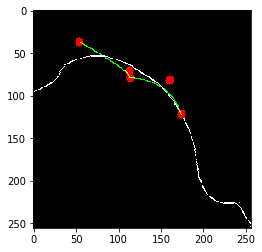

In [28]:
size = 256

img = (cv2.imread("river_skel.png"))

ori = []
for x in range(256):
    for y in range(256):
        if img[x][y][0] == 255:
            ori.append(np.array([x, y]))

random.shuffle(ori)
circle(B)
circle(mid)

con1 = np.array([random.randrange(int(mid[0]),int(A[0])), random.randrange(int(mid[1]),int(A[1]))])
con2 = np.array([random.randrange(int(B[0]), int(mid[0])), random.randrange(int(B[1]), int(mid[1]))])

print(con1, con2)
circle(con1)
circle(con2)

for t in np.linspace(0, 1, 10000):
    tmp1 = Bezier(A, con1, mid, t)
    img[int(tmp1[0])][int(tmp1[1])][1] =  255
    

for t in np.linspace(0, 1, 10000):
    tmp2 = Bezier(mid, con2, B, t)
    img[int(tmp2[0])][int(tmp2[1])][1] =  255
    
    
plt.imshow(img)

0.17453292519943295
1.5 1.0468034750622515


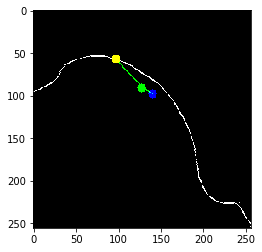

In [166]:
img = (cv2.imread("river_skel.png"))
ori = []
the =  10 * (2*np.pi / 360)
print(the)
r = 50
for x in range(256):
    for y in range(256):
        if img[x][y][0] == 255:
            ori.append(np.array([x, y]))

index = random.randrange(len(ori))
A1 = ori[index]
A2 = ori[index+10]
circle(A1, (255, 255, 0))
# circle(A2, (255, 0, 0))
m1 = slope(A1, A2)
m2 = (m1 - np.tan(the)) / (np.tan(the) * m1 + 1)
b = A1[1] - m2 * A1[0]

print(m1, m2)

for x in range(size):
    for y in range(size):
        if y <= m2 * x + b + 1 and y >= m2 * x + b - 1:
            if dis(A1, np.array([x, y])) >= r - 10 and dis(A1, np.array([x, y])) <= r + 10:
                B = np.array([x, y])
#                 print(B)

con = np.array([random.randrange(min(A1[0], B[0]), max(A1[0], B[0])), random.randrange(min(A1[1], B[1]), max(A1[1], B[1]))])
circle(B, (0, 0, 255))
circle(con, (0, 255, 0))
for t in np.linspace(0, 1, 10000):
    tmp1 = Bezier(A1, con, B, t)
    img[int(tmp1[0])][int(tmp1[1])][1] =  255
    
plt.imshow(img)
    